In [1]:
import numpy as np               
import pandas as pd 
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# - This package is large and takes some time to download, take the lighter version below.
# nltk.download()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [13]:
reviews = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names=['Text', 'Sentiment'])
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [14]:
reviews.head()

,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [15]:
reviews.shape

(748, 2)

## ------------------------  Preperparation ------------------------

In [16]:
reviews['Sentiment'].value_counts()

Sentiment
1    386
0    362
Name: count, dtype: int64

In [17]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [18]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [19]:
reviews.dtypes

Text         string[python]
Sentiment             int64
dtype: object

In [42]:
#get the review text for preprocessing
text = reviews['Text']
text[:3]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
Name: Text, dtype: string

In [50]:
text1 = []
#remove punctuation
for review in text:
    review = review.translate(str.maketrans('', '', string.punctuation))  
    text1.append(review)
 
text1[:5]

['A very very very slowmoving aimless movie about a distressed drifting young man  ',
 'Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ',
 'Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  ',
 'Very little music or anything to speak of  ',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head  ']

In [52]:
for i in range(3):
    print(f"Original Review: {reviews['Text'][i]}")
    print(f"Processed Review: {text1[i]}")
    print()

Original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Processed Review: A very very very slowmoving aimless movie about a distressed drifting young man  

Original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Processed Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  

Original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Processed Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  



In [54]:
text1_2 = []
# remove digits/numbers
for review in text1:
    review = review.translate(str.maketrans('', '', string.digits))
    text1_2.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1[i]}")
    print(f"Processed Review: {text1_2[i]}")
    print()

Original Review: A very very very slowmoving aimless movie about a distressed drifting young man  
Processed Review: A very very very slowmoving aimless movie about a distressed drifting young man  

Original Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
Processed Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  

Original Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  
Processed Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  



In [68]:
text1_3 = []
#remove stop words
for review in text1_2:
    review_tokens = word_tokenize(review)
    filtered_review = [word for word in review_tokens if word.lower() not in stopwords.words('english')]
    text1_3.append(' '.join(filtered_review))
#     review = review.translate(str.maketrans('', '', string.digits))
#     text1_2.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1_2[i]}")
    print(f"Processed Review: {text1_3[i]}")
    print()

Original Review: A very very very slowmoving aimless movie about a distressed drifting young man  
Processed Review: slowmoving aimless movie distressed drifting young man

Original Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
Processed Review: sure lost flat characters audience nearly half walked

Original Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  
Processed Review: Attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent



In [72]:
text1_4 = []
#change to lowercase
for review in text1_3:
    review = review.lower()
    #print(sentence)
    text1_4.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1_3[i]}")
    print(f"Processed Review: {text1_4[i]}")
    print()

Original Review: slowmoving aimless movie distressed drifting young man
Processed Review: slowmoving aimless movie distressed drifting young man

Original Review: sure lost flat characters audience nearly half walked
Processed Review: sure lost flat characters audience nearly half walked

Original Review: Attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent
Processed Review: attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent



In [73]:
# finilaise the preprocessed text to text1. 
text1 = pd.Series(text1_4)
text1[:5]

0    slowmoving aimless movie distressed drifting y...
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [74]:
#apply lemmatising
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text2 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w) for w in x.split()))
text2[:5] #notice that it does not do a good job

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    slowmoving aimless movie distressed drifting y...
1    sure lost flat character audience nearly half ...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [75]:
#apply lemmatising with POS tags

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5] #notice that it does a better job

0    slowmoving aimless movie distressed drift youn...
1    sure lose flat character audience nearly half ...
2    attempt artiness black white clever camera ang...
3                          little music anything speak
4    best scene movie gerardo try find song keep ru...
dtype: object

In [55]:
# #apply stemming
# ps = nltk.PorterStemmer()

# text4 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
# text4[:5]

In [76]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,slowmoving aimless movie distressed drift youn...,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1
...,...,...
743,get bore watch jessice lange take clothes,0
744,unfortunately virtue film production work lose...,0
745,word embarrass,0
746,exceptionally bad,0


In [77]:
for i in range(3):
    print(f"Original Review: {reviews['Text'][i]}")
    print(f"Processed Review: {reviewsP['Review'][i]}")
    print()

Original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Processed Review: slowmoving aimless movie distressed drift young man

Original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Processed Review: sure lose flat character audience nearly half walk

Original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Processed Review: attempt artiness black white clever camera angle movie disappointed become even ridiculous act poor plot line almost nonexistent



## ------------------------ Classification ------------------------

In [29]:
#transform text into BoW with count features
cv=CountVectorizer()

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

#see the features
cv.get_feature_names_out()

array(['aailiyah', 'abandon', 'ability', ..., 'zombie', 'zombiestudents',
       'zombiez'], dtype=object)

In [30]:
print(cv_reviews)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6785 stored elements and shape (748, 2626)>
  Coords	Values
  (0, 2070)	1
  (0, 49)	1
  (0, 1494)	1
  (0, 625)	1
  (0, 654)	1
  (0, 2616)	1
  (0, 1395)	1
  (1, 2217)	1
  (1, 1368)	1
  (1, 881)	1
  (1, 337)	1
  (1, 138)	1
  (1, 1522)	1
  (1, 1028)	1
  (1, 2513)	1
  (2, 1494)	1
  (2, 135)	1
  (2, 118)	1
  (2, 215)	1
  (2, 2555)	1
  (2, 383)	1
  (2, 292)	1
  (2, 81)	1
  (2, 609)	1
  (2, 185)	1
  :	:
  (743, 2242)	1
  (743, 2524)	1
  (743, 970)	1
  (743, 244)	1
  (743, 1295)	1
  (743, 1237)	1
  (743, 390)	1
  (744, 1368)	1
  (744, 2587)	1
  (744, 855)	1
  (744, 1967)	1
  (744, 2433)	1
  (744, 1763)	1
  (744, 2495)	1
  (744, 1842)	1
  (745, 2585)	1
  (745, 702)	1
  (746, 160)	1
  (746, 773)	1
  (747, 2523)	1
  (747, 1593)	1
  (747, 1476)	1
  (747, 1116)	1
  (747, 1196)	1
  (747, 1192)	1


In [31]:
cv_reviews.shape

(748, 2626)

In [32]:
#to see the data in the typical tabular format
df =  pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,aailiyah,abandon,ability,abroad,absolutely,abstruse,abysmal,academy,accent,accessible,...,young,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
cv=CountVectorizer(max_features=10000)

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

cv_reviews.shape

(748, 2626)

In [34]:
# Trasform text into Tfidf representations
tv=TfidfVectorizer()

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

print(tv.get_feature_names_out())

['aailiyah' 'abandon' 'ability' ... 'zombie' 'zombiestudents' 'zombiez']


In [35]:
tv_reviews.shape

(748, 2626)

In [36]:
print(tv_reviews[0])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 2626)>
  Coords	Values
  (0, 2070)	0.4347812103269538
  (0, 49)	0.4347812103269538
  (0, 1494)	0.1662967075879829
  (0, 625)	0.4347812103269538
  (0, 654)	0.4093265466008387
  (0, 2616)	0.36581151154349056
  (0, 1395)	0.32229647648614246


In [37]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
tv=TfidfVectorizer(max_features=10000)

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

tv_reviews.shape

(748, 2626)

In [38]:
#get to top n features with the highest tf-idf 
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]] 

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['movie', 'film', 'bad', 'see', 'good', 'one', 'like', 'watch',
       'well', 'make'], dtype=object)]


In [39]:
df1 =  pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

df1['movie'].describe()

count    748.000000
mean       0.041413
std        0.095187
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.613011
Name: movie, dtype: float64

<Axes: >

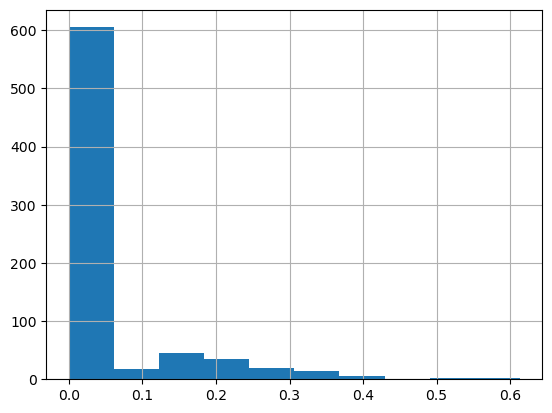

In [40]:
df1['movie'].hist()

In [41]:
df1['film'].describe()

count    748.000000
mean       0.037167
std        0.087941
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.607182
Name: film, dtype: float64